In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

# Exploratory Data Analysis of Music Trends: Unveiling Insights through Python

## Introduction:

This project delves into the realm of music data analysis, focusing on exploring trends, patterns, and insights hidden within a comprehensive dataset. By leveraging Python and visualization techniques, we aim to unravel the intricate dynamics of the music industry, shedding light on factors such as artist popularity, track performance, and consumer preferences.

## Summary of the Dataset:

1. Artist: Name of the artist or group associated with the music track.
2. Title: Title of the music track.
3. Year: Year of release.
4. Sales: Sales figure associated with the track.
5. Streams: Number of streams the track has received.
6. Downloads: Number of downloads for the track.
7. Radio Plays: Count of radio plays.
8. Rating: Rating associated with the track.

## Objective:

The objective of this project is to conduct an in-depth exploratory analysis of the music dataset to uncover valuable insights into various aspects of the music industry. Through visualization and statistical analysis, we seek to understand trends in music sales, streaming behavior, artist popularity, and more, ultimately providing actionable insights for stakeholders in the music industry.

## Key Focus Areas:

- Data Preprocessing: Cleaning and preparing the dataset for analysis, handling missing values, and ensuring data consistency.
- Exploratory Data Analysis (EDA): Utilizing Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn for EDA to understand the distribution, summary statistics, and relationships between different variables.
- Visualization Techniques: Employing various visualization techniques including bar plots, histograms, scatter plots, and heatmaps to visually represent trends, patterns, and correlations within the data.
- Trend Analysis: Identifying trends in music sales, streaming numbers, and download counts over time, and examining the impact of different factors such as artist, title, and year.
- Artist and Track Performance: Analyzing artist popularity, track ratings, and radio plays to gauge the performance and reception of different music tracks.
- Consumer Behavior: Investigating consumer preferences by analyzing streaming patterns, download trends, and radio play distributions across different genres and time periods.
- Insights and Recommendations: Summarizing key findings and deriving actionable insights for stakeholders in the music industry, such as music labels, streaming platforms, and artists.

In [2]:
df = pd.read_csv('/kaggle/input/top-songs-of-the-world/Song.csv')
df.head()

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
0,Bill Haley & his Comets,Rock Around the Clock,1955,36.503,19.961,7.458,5.663,0.760
1,Celine Dion,My Heart Will Go On,1998,35.405,12.636,8.944,23.701,3.610
2,Sinead O'Connor,Nothing Compares 2 U,1990,35.135,14.582,10.242,23.747,2.733
3,The Beatles,Hey Jude,1968,34.442,25.545,16.390,16.541,1.510
4,Bryan Adams,(Everything I Do) I Do it For You,1991,34.367,16.523,12.368,23.194,3.121


# Data Preprocessing

In [3]:
#check the columns name
df.columns

Index(['Artist', 'Title', 'Year', 'Sales', 'Streams', 'Downloads',
       'Radio Plays', 'Rating'],
      dtype='object')

In [4]:
# Rename columns to lowercase
df.columns = df.columns.str.lower()

# Rename the 'Radio Plays' column to 'radio_plays'
df.rename(columns={'radio plays': 'radio_plays'}, inplace=True)

# Verify the new column names
print("\nNew column names:")
print(df.columns)


New column names:
Index(['artist', 'title', 'year', 'sales', 'streams', 'downloads',
       'radio_plays', 'rating'],
      dtype='object')


In [5]:
#Checking the data shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 4850 rows and 8 columns


In [6]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   artist       4850 non-null   object 
 1   title        4850 non-null   object 
 2   year         4850 non-null   int64  
 3   sales        4850 non-null   float64
 4   streams      4850 non-null   float64
 5   downloads    4850 non-null   float64
 6   radio_plays  4850 non-null   float64
 7   rating       4850 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 303.2+ KB


In [7]:
# Checking the null values in the dataset
df.isna().sum()

artist         0
title          0
year           0
sales          0
streams        0
downloads      0
radio_plays    0
rating         0
dtype: int64

In [8]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


In [9]:
# Stastic about the data set
df.describe().style.background_gradient(cmap='bone_r')

,year,sales,streams,downloads,radio_plays,rating
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,1979.861443,8.154870,4.628823,2.970114,3.985120,0.481876
std,19.759676,4.555715,3.273776,2.668744,4.354419,0.624719
min,1901.000000,4.149000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,5.069250,2.351250,1.039500,0.600000,0.000000
50%,1981.000000,6.438000,4.200000,2.200000,2.570000,0.512000
75%,1996.000000,9.784000,6.307000,4.183750,5.884000,0.571000
max,2014.000000,36.503000,25.545000,19.780000,24.393000,4.460000


# About the DataSet

- Data Size: The dataset comprises 4850 rows and 8 columns, offering a substantial amount of information for analysis.
- Data Types: The dataset features a mix of data types, including int64, float64 and object.
- Missing Values: No missing values simplify data cleaning.
- Unique Values: The dataset contains 0 duplicate values, indicating that each row represents distinct information, eliminating redundancy.
- Irrelevant Features: All the Features seems important and useful for final evaluation.

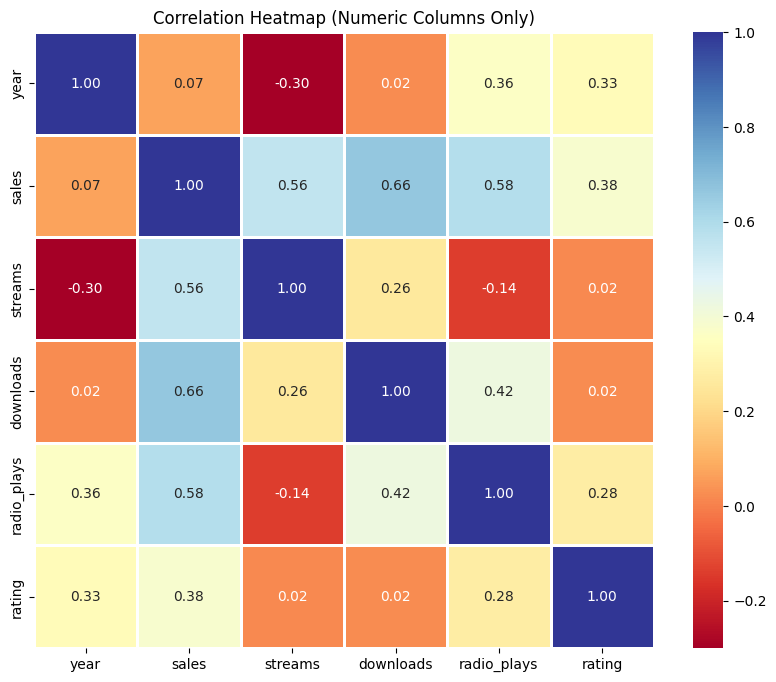

In [10]:
# Filter out only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlBu', fmt='.2f', linewidths=1)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# Explore Data Analysis

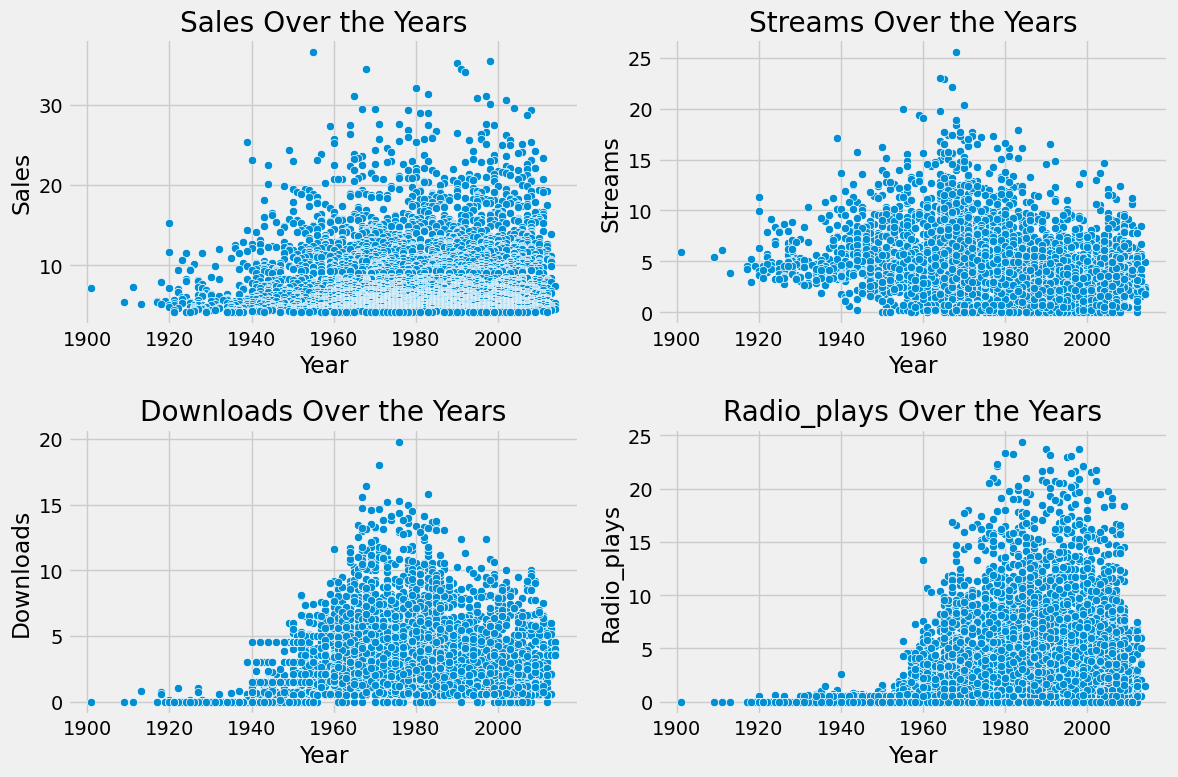

In [11]:
# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define the columns for plotting
columns = ['sales', 'streams', 'downloads', 'radio_plays']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate through each column and create scatter plots using Seaborn
for i, col in enumerate(columns):
    sns.scatterplot(data=df, x='year', y=col, ax=axs[i])
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(col.capitalize())  # Capitalize the column name for the y-axis label
    axs[i].set_title(f'{col.capitalize()} Over the Years')

# Adjust layout and display
plt.tight_layout()
plt.show()

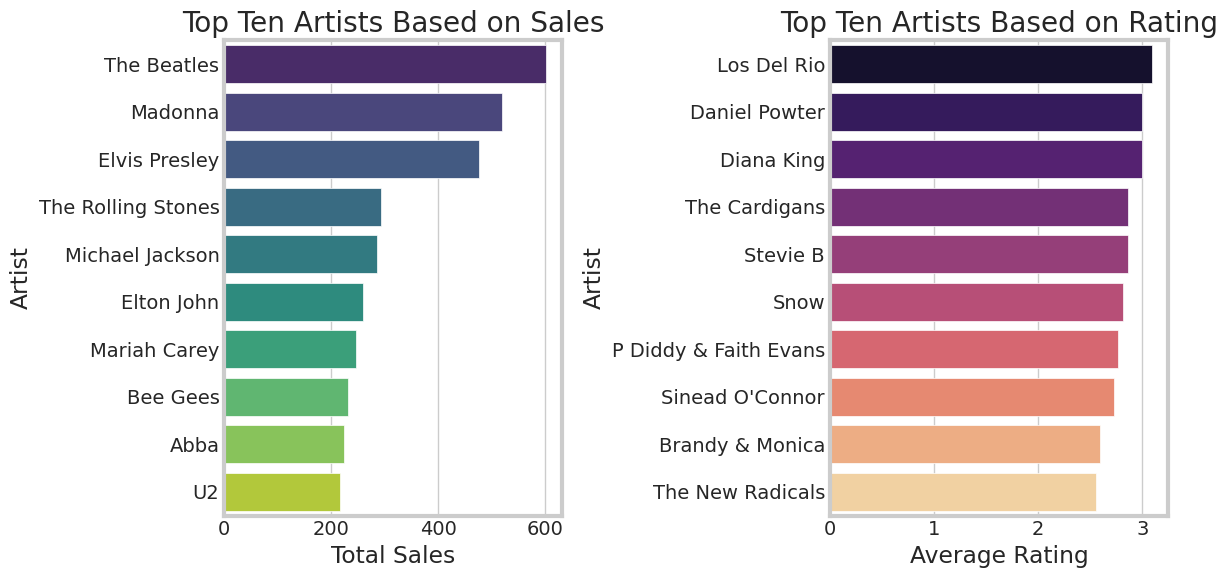

In [12]:
# List of metrics to plot
metrics = ['sales', 'rating']  # Add more metrics as needed

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 6))

# Loop through each metric and create subplots
for i, metric in enumerate(metrics):
    # Obtain the top ten artists based on the current metric
    top_ten = df.groupby('artist')[metric].agg('mean' if metric == 'rating' else 'sum').nlargest(10).reset_index()
    
    # Plot the top ten artists
    sns.barplot(x=metric, y='artist', data=top_ten, ax=axes[i], palette='viridis' if metric == 'sales' else 'magma')
    axes[i].set_title(f'Top Ten Artists Based on {metric.capitalize()}')
    axes[i].set_xlabel(f'Total {metric.capitalize()}' if metric == 'sales' else f'Average {metric.capitalize()}')
    axes[i].set_ylabel('Artist')

plt.tight_layout()
plt.show()

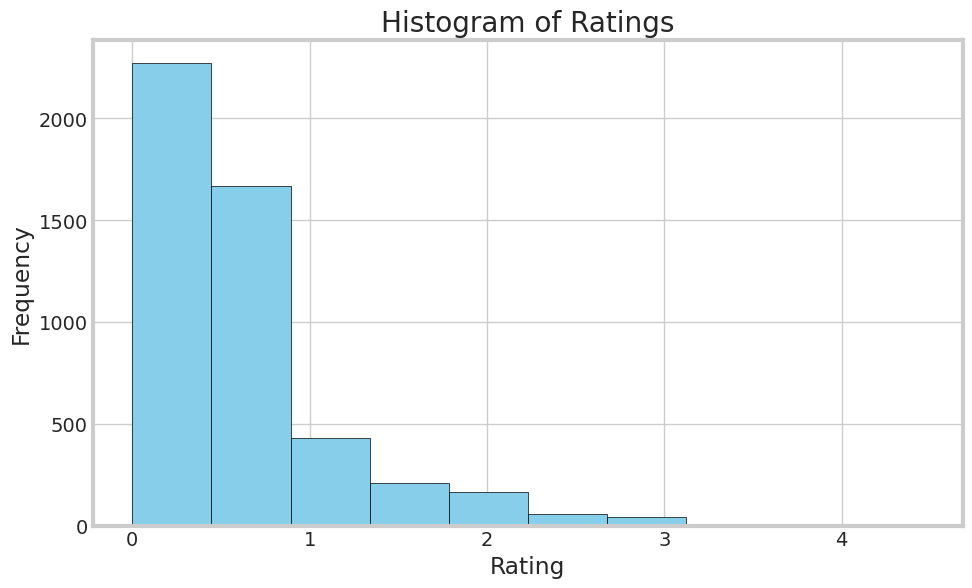

In [13]:
# Histogram plot for ratings
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

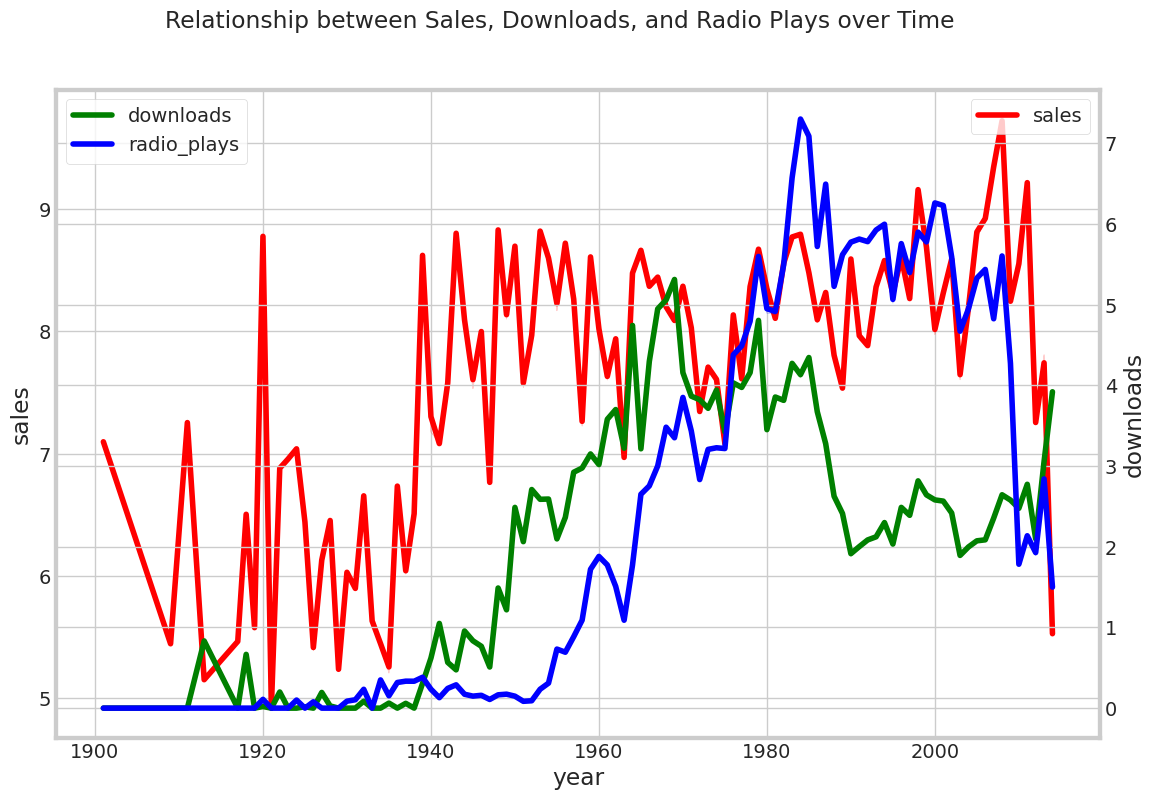

In [14]:
def ploting(df, col2, col3, col4, col1="year"):
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size here
    plot1 = sns.lineplot(data=df, x=col1, y=col2, errorbar=('ci', False), ax=ax, color="red", label=col2)
    ax2 = ax.twinx()
    plot2 = sns.lineplot(data=df, x=col1, y=col3, errorbar=('ci', False), ax=ax2, color="green", label=col3)
    plot3 = sns.lineplot(data=df, x=col1, y=col4, errorbar=('ci', False), ax=ax2, color="blue", label=col4)
    ax.legend(loc="upper right")  # Add legend for the first y-axis
    ax2.legend(loc="upper left")  # Add legend for the second y-axis
    return fig

title = ploting(df[["year", "sales", "downloads", "radio_plays"]], "sales", "downloads", "radio_plays")
title.suptitle("Relationship between Sales, Downloads, and Radio Plays over Time")
plt.show()